# Customer Spending Data Analysis

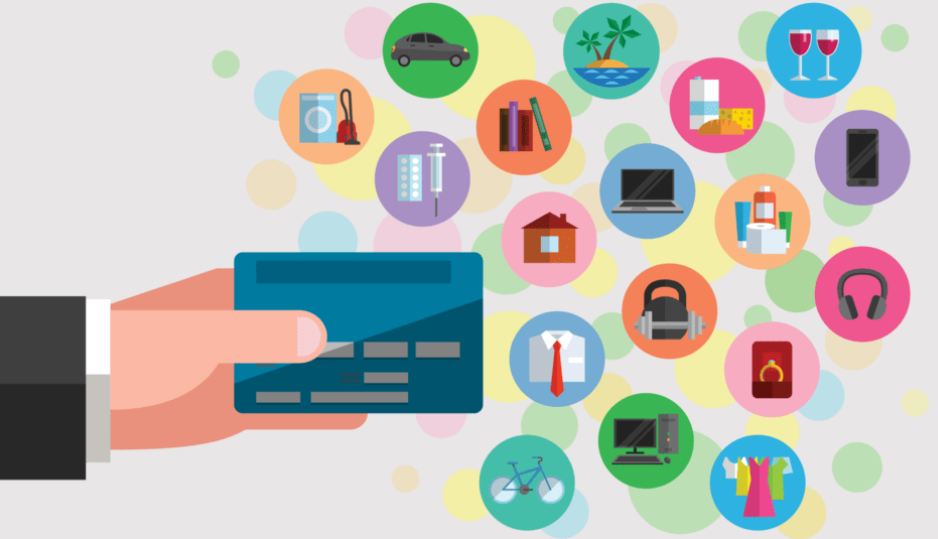

In [1]:
# importing dependecies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import warnings
warnings.filterwarnings("ignore")

In [180]:
#Importing Dataset
df = pd.read_csv('Customer_Spending.csv')
sns.set()

In [181]:
#Data Overview
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [182]:
#removing unnecessary columns
df.drop(['index','Column1'], axis = 1, inplace = True)

In [8]:
df.head(3)

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.0,80.0,109.0
1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.5,49.0,57.0
2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.0,11.0,15.0


In [9]:
# Column details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Year              34866 non-null  float64
 2   Month             34866 non-null  object 
 3   Customer Age      34866 non-null  float64
 4   Customer Gender   34866 non-null  object 
 5   Country           34866 non-null  object 
 6   State             34866 non-null  object 
 7   Product Category  34866 non-null  object 
 8   Sub Category      34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit Cost         34866 non-null  float64
 11  Unit Price        34866 non-null  float64
 12  Cost              34866 non-null  float64
 13  Revenue           34867 non-null  float64
dtypes: float64(7), object(7)
memory usage: 3.7+ MB


In [10]:
# Row/Column
df.shape

(34867, 14)

In [185]:
#Null check
df.isnull().sum()

Date                1
Year                1
Month               1
Customer Age        1
Customer Gender     1
Country             1
State               1
Product Category    1
Sub Category        1
Quantity            1
Unit Cost           1
Unit Price          1
Cost                1
Revenue             0
dtype: int64

In [186]:
# dropping Null record
df.dropna(inplace = True)

In [187]:
df.isnull().sum()

Date                0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
dtype: int64

In [15]:
# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 1


In [ ]:
df.drop_duplicates(inplace = True)

In [19]:
# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 0


In [20]:
# Statistical Overview
df.describe()

,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue
count,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000
mean,2015.569253,36.382705,2.002524,349.890315,389.243248,576.020479,640.887652
std,0.495188,11.113005,0.813948,490.019492,525.322781,690.503877,736.653849
min,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000
25%,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000
50%,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000
75%,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000
max,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000


# Data Preparation

In [188]:
df['Year'] = df['Year'].astype(int)

In [189]:
df['Customer Age']=df['Customer Age'].astype(int)

In [190]:
df['Date'] = pd.to_datetime(df['Date'])

In [191]:
df['Margin']=df['Revenue']-df['Cost']

In [192]:
#Creating a year_month Column
df['Year_Month'] = df['Date'].dt.strftime('%Y-%m')

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34866 entries, 0 to 34865
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Year              34866 non-null  int32         
 2   Month             34866 non-null  object        
 3   Customer Age      34866 non-null  int32         
 4   Customer Gender   34866 non-null  object        
 5   Country           34866 non-null  object        
 6   State             34866 non-null  object        
 7   Product Category  34866 non-null  object        
 8   Sub Category      34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit Cost         34866 non-null  float64       
 11  Unit Price        34866 non-null  float64       
 12  Cost              34866 non-null  float64       
 13  Revenue           34866 non-null  float64       
 14  Margin            34866 non

In [194]:
df.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Margin,Year_Month
0,2016-02-19,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,29.0,2016-02
1,2016-02-20,2016,February,29,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,8.0,2016-02
2,2016-02-27,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,4.0,2016-02
3,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,58.0,2016-03
4,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,20.0,2016-03


# Exploratory Data Analysis

### Customer overall Age distribution

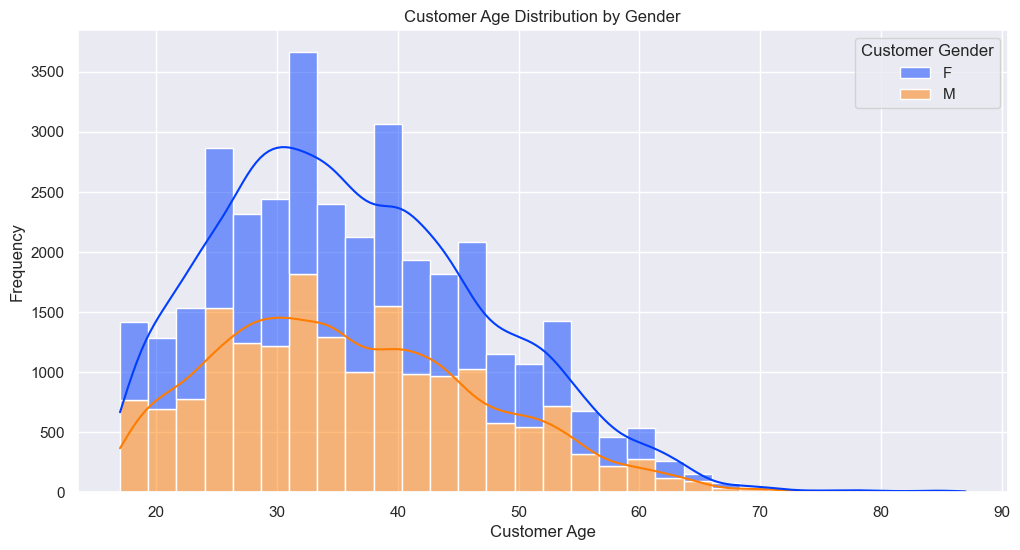

In [131]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Customer Age', hue='Customer Gender', bins=30, kde=True, multiple='stack', palette='bright')
plt.title('Customer Age Distribution by Gender')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

In [30]:
df1 = df['Customer Gender'].value_counts()
df1

Customer Gender
M    17805
F    17060
Name: count, dtype: int64

### Gender demographic

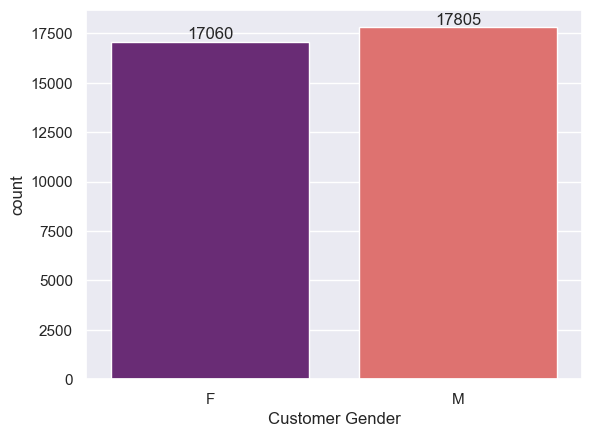

In [42]:
ax = sns.countplot(x='Customer Gender', data=df, palette= 'magma')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Product Category distribution

In [45]:
df2 = df['Product Category'].value_counts()
df2

Product Category
Accessories    22533
Bikes           7093
Clothing        5239
Name: count, dtype: int64

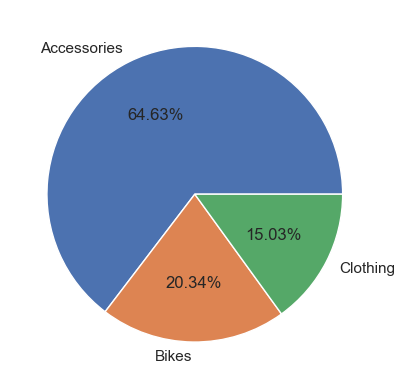

In [48]:
df2.plot(kind = 'pie', autopct = '%1.2f%%')
plt.ylabel(None)
plt.show()

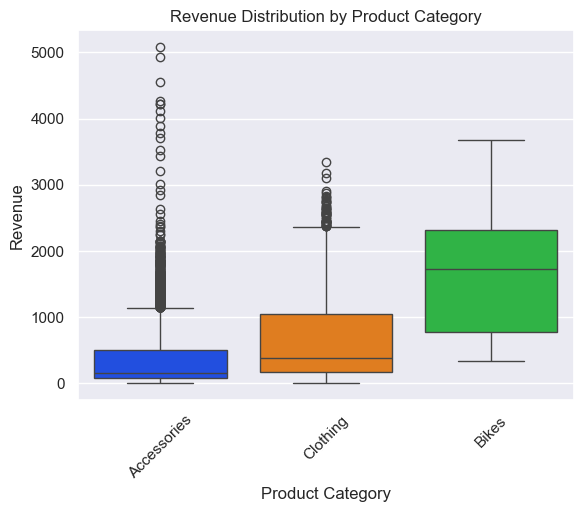

In [54]:
sns.boxplot(data=df, x='Product Category', y='Revenue', palette='bright')
plt.title('Revenue Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

### Yearly Revenue Trend

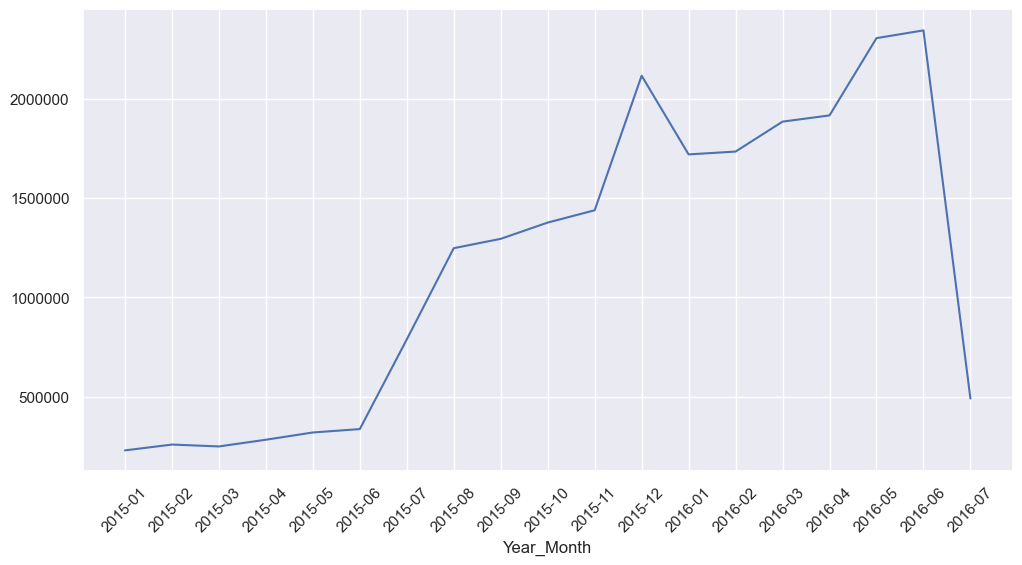

In [123]:
plt.figure(figsize=(12,6))
df5 = df.groupby('Year_Month')['Revenue'].sum()
ax = sns.lineplot(x = df5.index, y =df5.values)
ax.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()

### Margin by year 

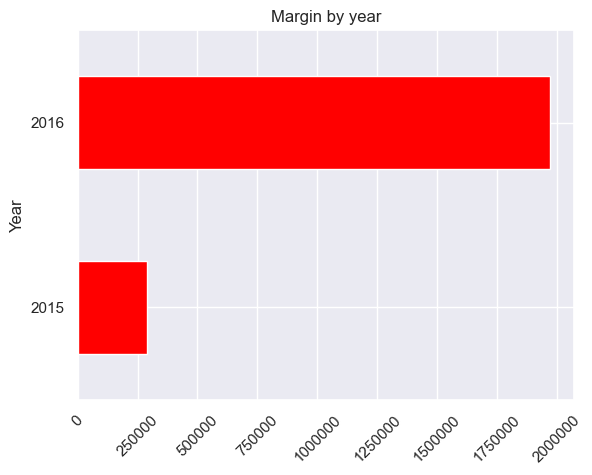

In [78]:
ax = df.groupby('Year')['Margin'].sum().plot.barh(color='red',title='Margin by year')
ax.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)
plt.show()

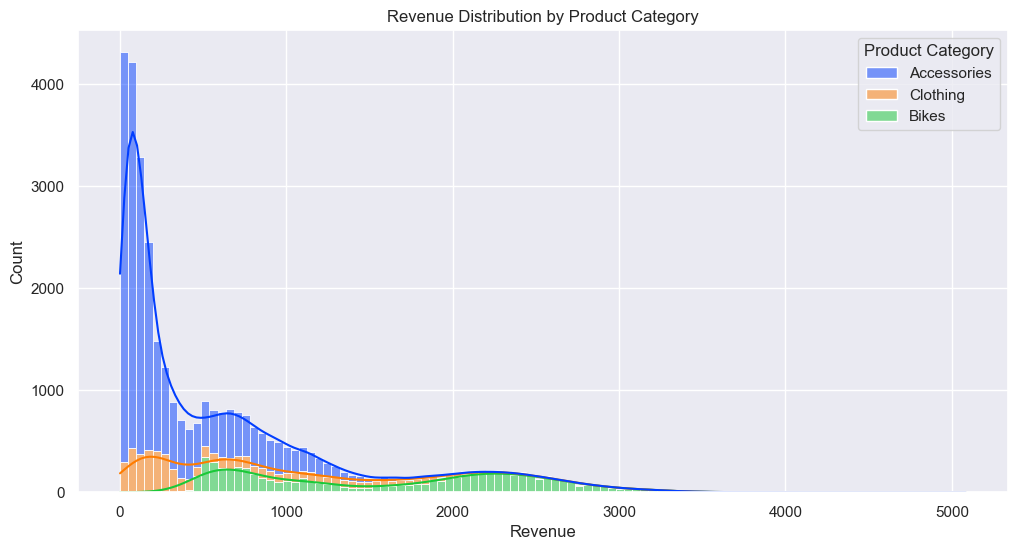

In [137]:
plt.figure(figsize=(12,6))
sns.histplot(x = 'Revenue', data = df, hue = 'Product Category', kde = True,multiple='stack', palette='bright')
plt.title('Revenue Distribution by Product Category')
plt.xlabel('Revenue')
plt.show()

### Top 10 most revenue generating Item

In [96]:
df3 = df.groupby('Sub Category')['Revenue'].sum().sort_values(ascending = False).head(10)
df3

Sub Category
Mountain Bikes       5176456.0
Road Bikes           3921989.0
Tires and Tubes      2865915.0
Helmets              2738210.0
Touring Bikes        2387910.0
Jerseys              1834110.0
Bottles and Cages     709379.0
Shorts                689184.0
Hydration Packs       403276.0
Vests                 368681.0
Name: Revenue, dtype: float64

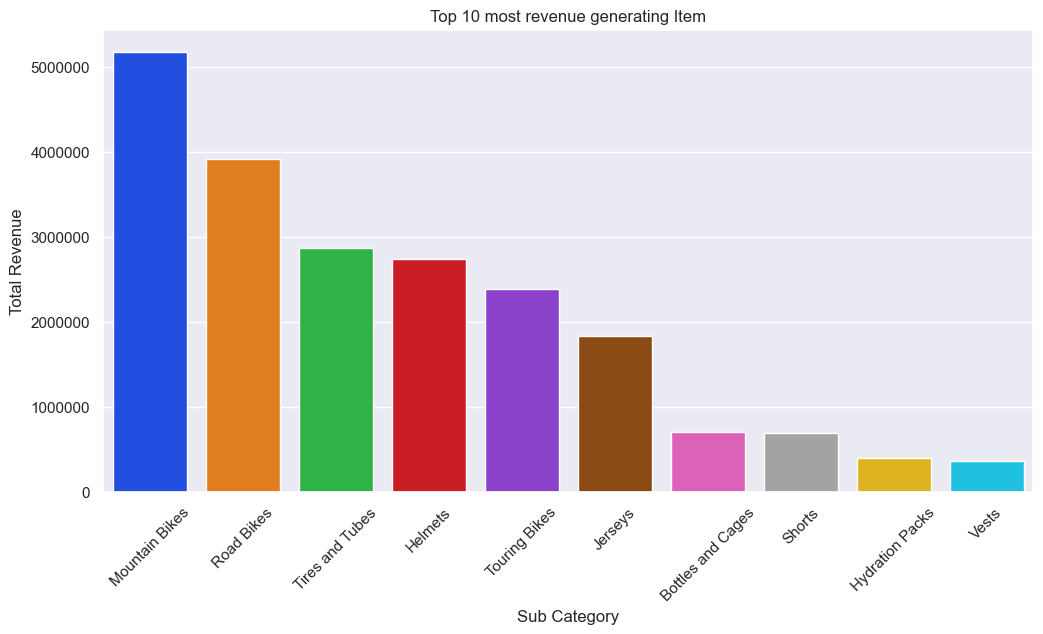

In [106]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = df3.index, y = df3.values, palette = 'bright')
ax.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.title('Top 10 most revenue generating Item')
plt.ylabel('Total Revenue')
plt.xlabel('Sub Category')
plt.show()

### Most Sold Items

In [102]:
df4 = df.groupby('Sub Category')['Quantity'].sum().sort_values(ascending = False).head(10)
df4

Sub Category
Tires and Tubes      22213.0
Bottles and Cages    10556.0
Helmets               8387.0
Road Bikes            6119.0
Mountain Bikes        5499.0
Jerseys               4033.0
Caps                  3020.0
Touring Bikes         2673.0
Fenders               1494.0
Shorts                1129.0
Name: Quantity, dtype: float64

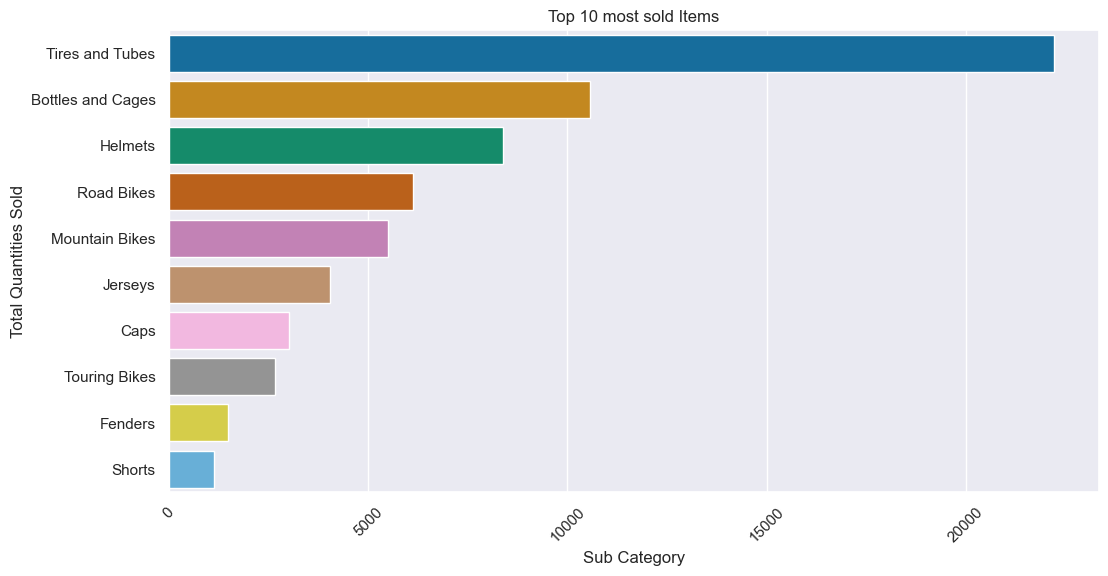

In [111]:
plt.figure(figsize=(12,6))
sns.barplot(x = df4.values, y = df4.index , palette = 'colorblind')
plt.xticks(rotation=45)
plt.title('Top 10 most sold Items')
plt.ylabel('Total Quantities Sold')
plt.xlabel('Sub Category')
plt.show()

### Revenue vs Cost 

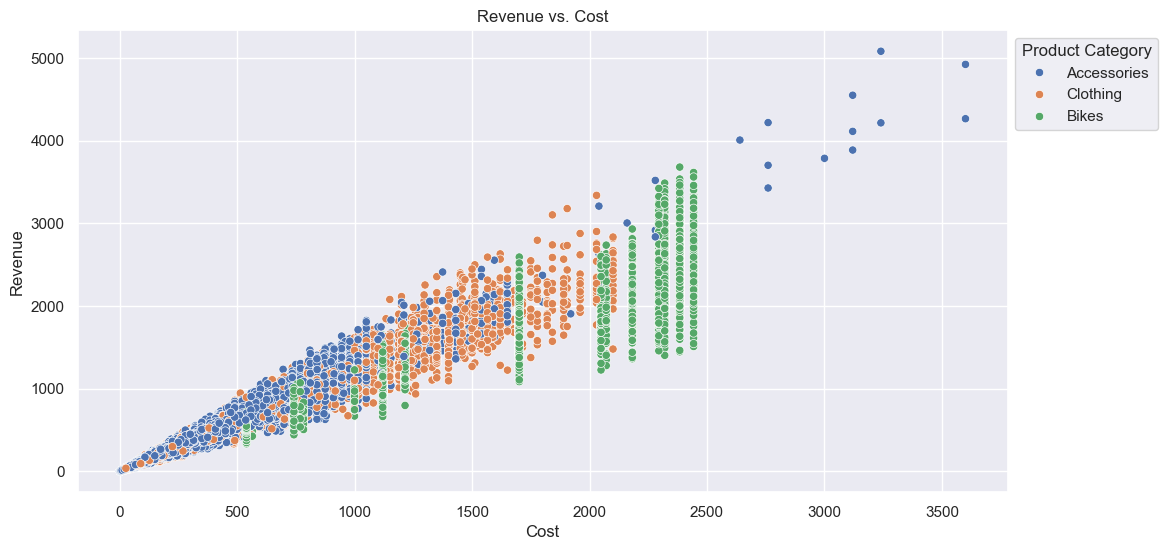

In [126]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Cost', y='Revenue', hue='Product Category')
plt.title('Revenue vs. Cost')
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.legend(title='Product Category', bbox_to_anchor=(1, 1))
plt.show()

###  Heatmap of Revenue by Month and Product Category

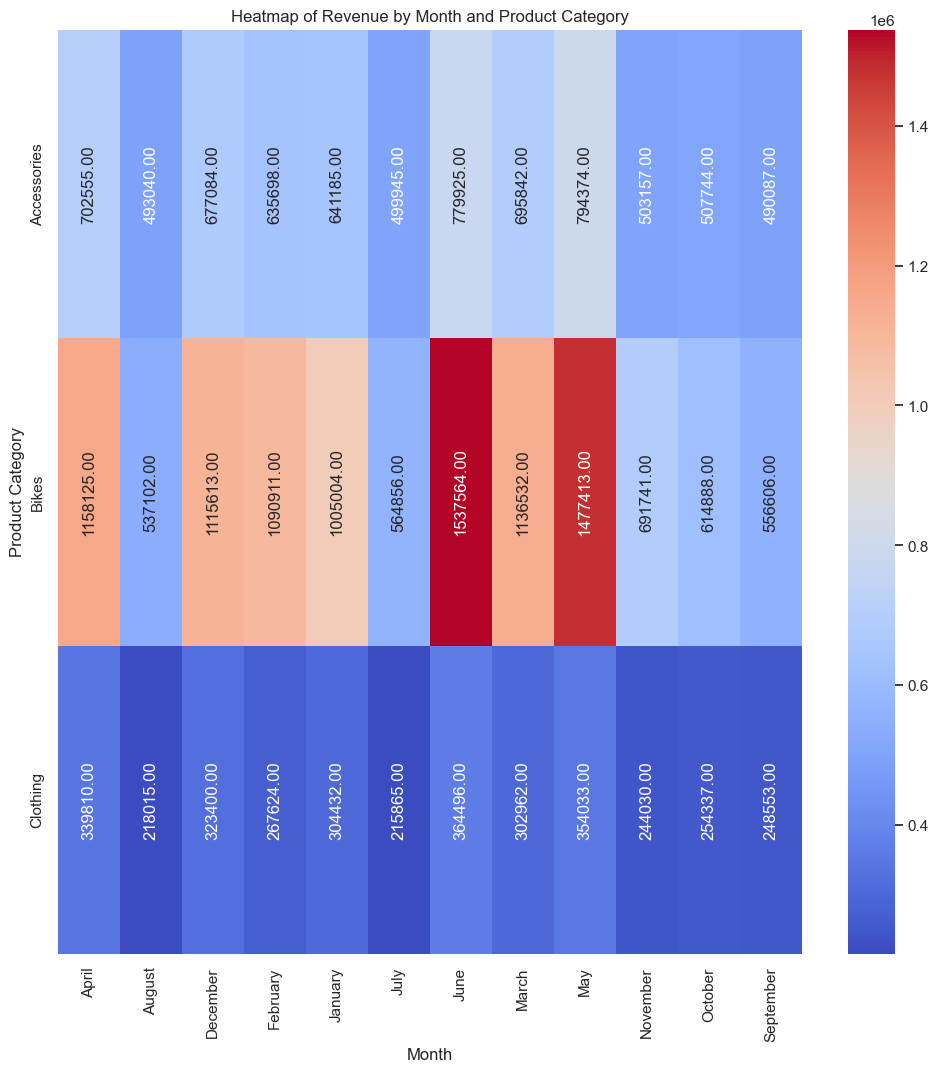

In [151]:
plt.figure(figsize=(12,12))
pivot_table = df.pivot_table(index='Product Category', columns='Month', values='Revenue', aggfunc='sum')
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.2f', annot_kws={'rotation': 90})
plt.title('Heatmap of Revenue by Month and Product Category')
plt.xlabel('Month')
plt.ylabel('Product Category')
plt.show()

### Total Revenue by Year

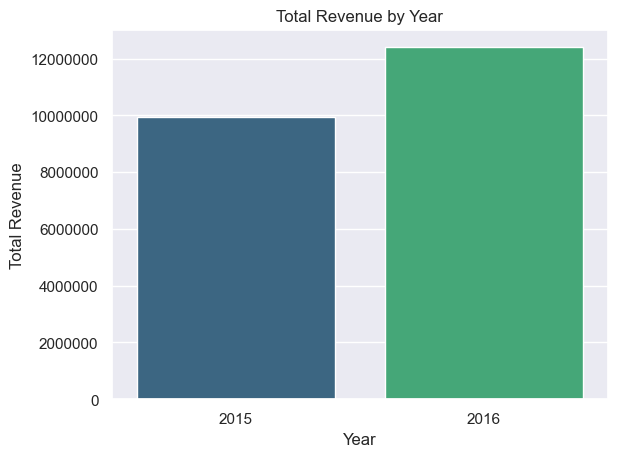

In [153]:
ax = sns.barplot(data=df, x='Year', y='Revenue', estimator=sum, ci=None, palette='viridis')
plt.title('Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
ax.ticklabel_format(style='plain', axis='y')
plt.show()

### Countrywise Customer Count

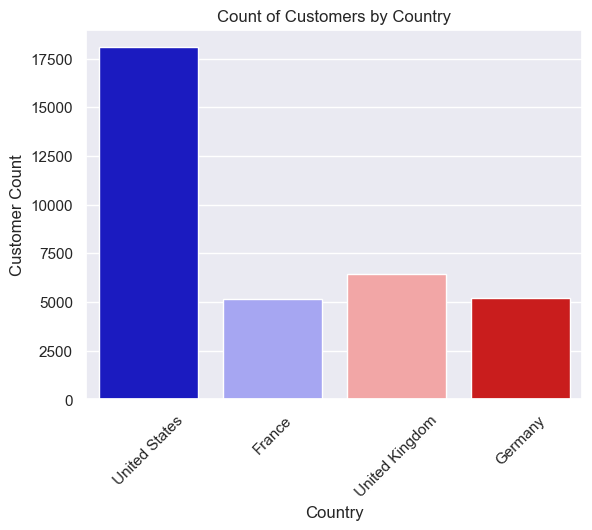

In [156]:
sns.countplot(data=df, x='Country', palette='seismic')
plt.title('Count of Customers by Country')
plt.xlabel('Country')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.show()

### Monthly Revenue Trends by Product Category

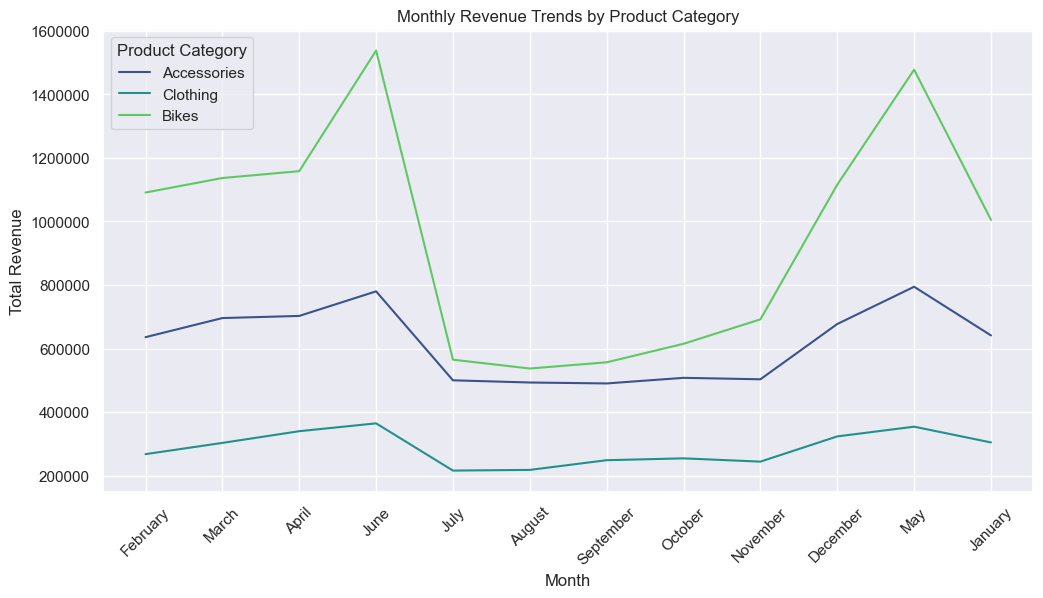

In [169]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=df, x='Month', y='Revenue', hue='Product Category', estimator=sum, ci=None, palette='viridis')
plt.title('Monthly Revenue Trends by Product Category')
ax.ticklabel_format(style='plain', axis='y')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()

### States with most revenues

In [164]:
df6 = df.groupby('State')['Revenue'].sum().sort_values(ascending = False).head(10)
df6

State
California             6076916.0
England                4276220.0
Washington             2873511.0
Oregon                 1383186.0
Saarland               1055844.0
Nordrhein-Westfalen     931677.0
Hessen                  917107.0
Seine (Paris)           719148.0
Hamburg                 714036.0
Bayern                  537380.0
Name: Revenue, dtype: float64

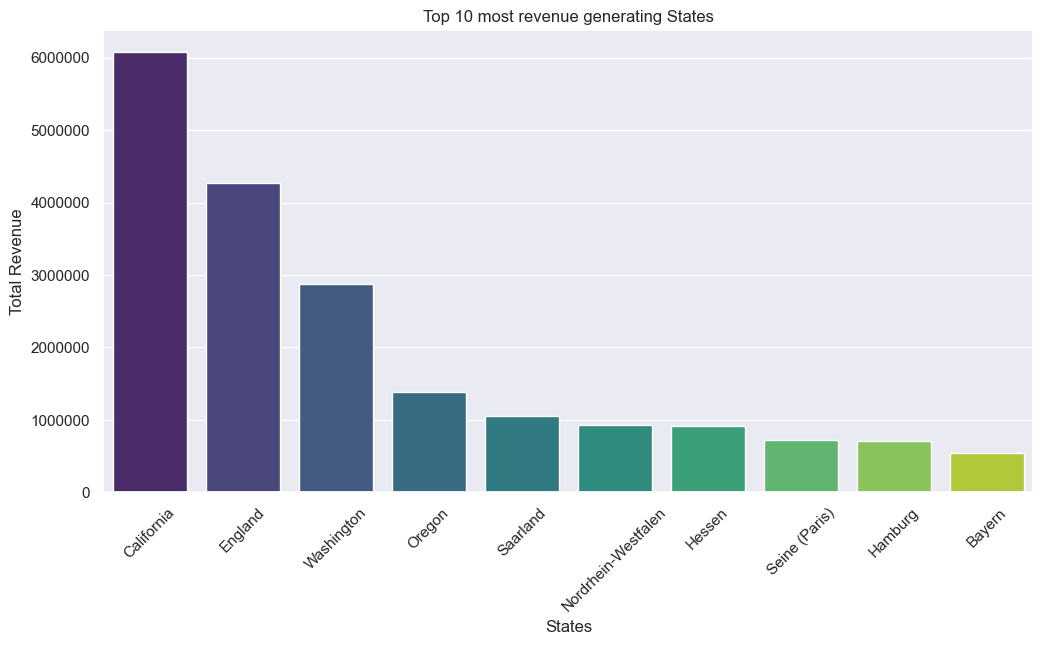

In [168]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = df6.index, y = df6.values, palette = 'viridis')
ax.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.title('Top 10 most revenue generating States')
plt.ylabel('Total Revenue')
plt.xlabel('States')
plt.show()

### Pairplot of Numeric Columns

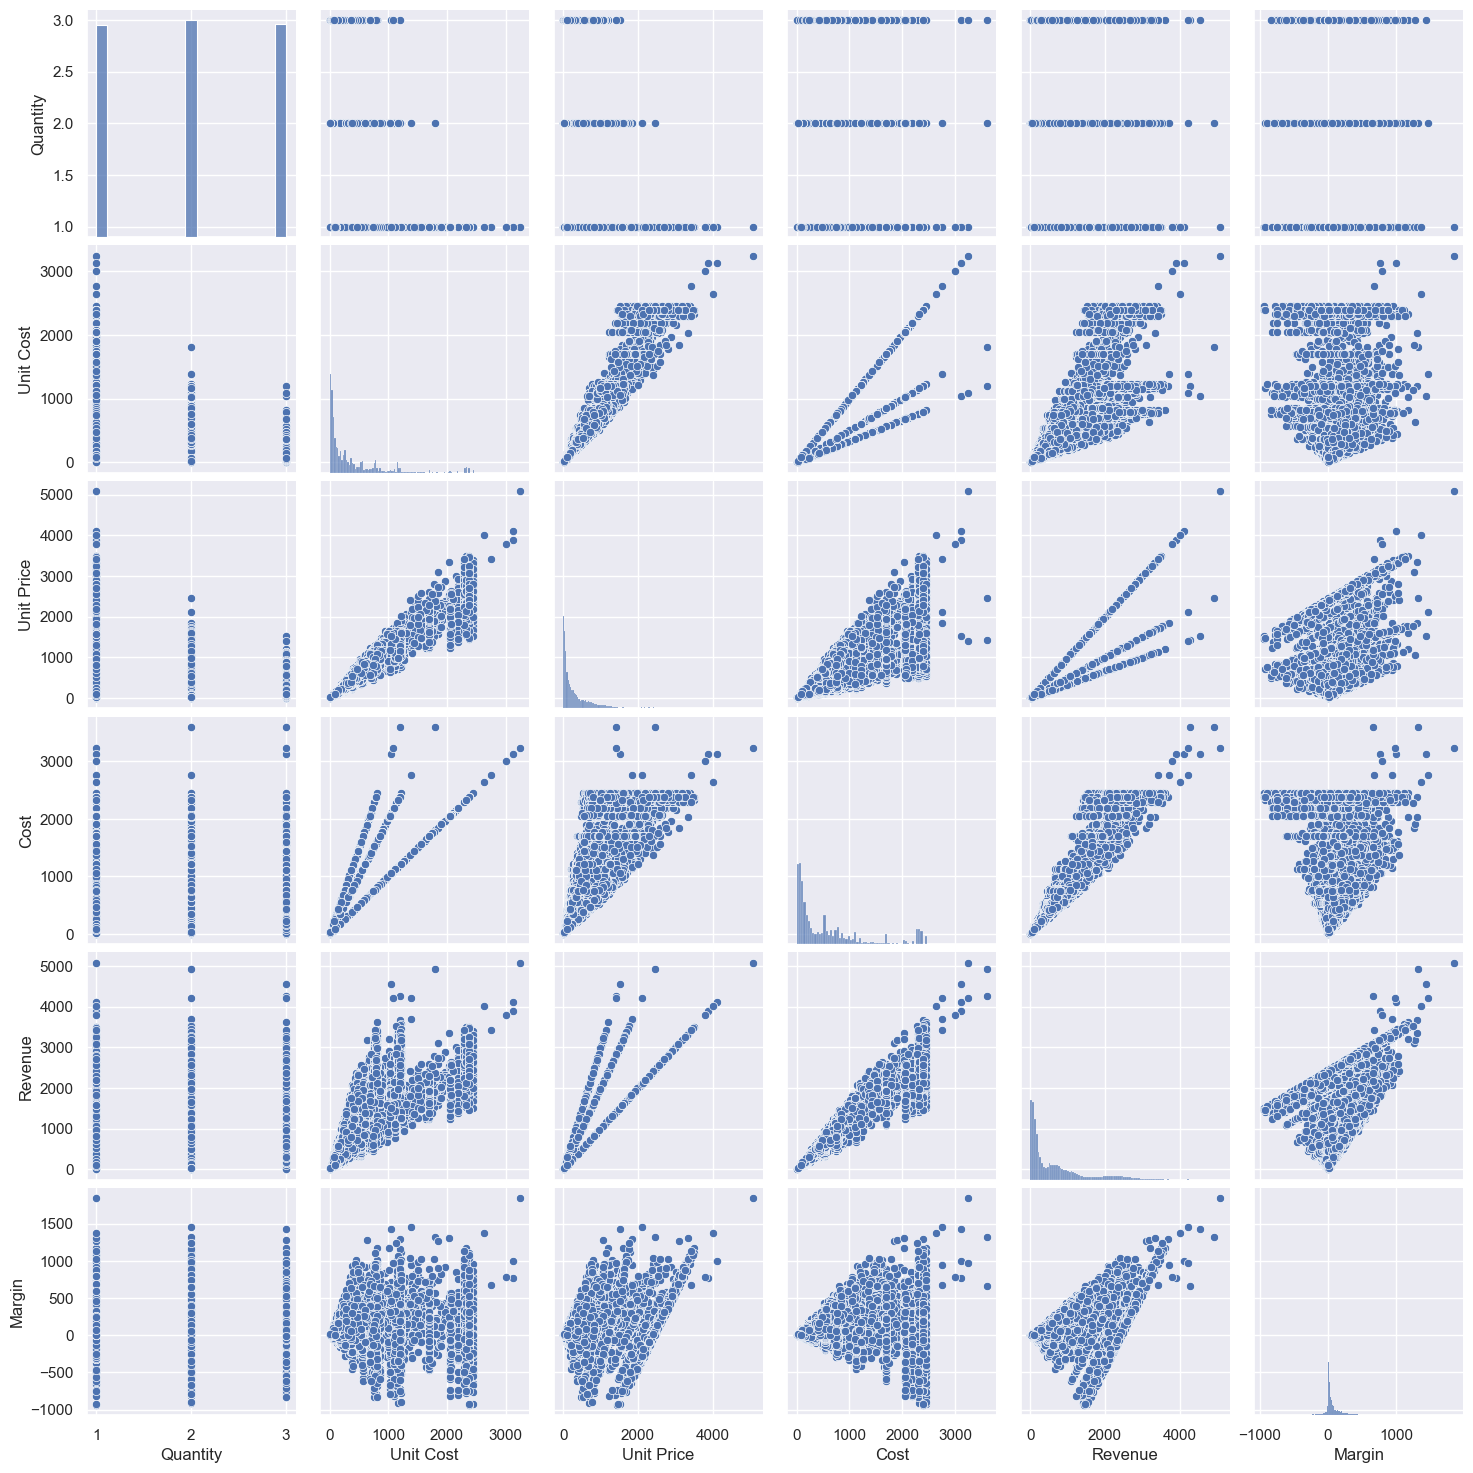

In [170]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(data=df[numeric_cols])
plt.show()

### Revenue Trend by Country

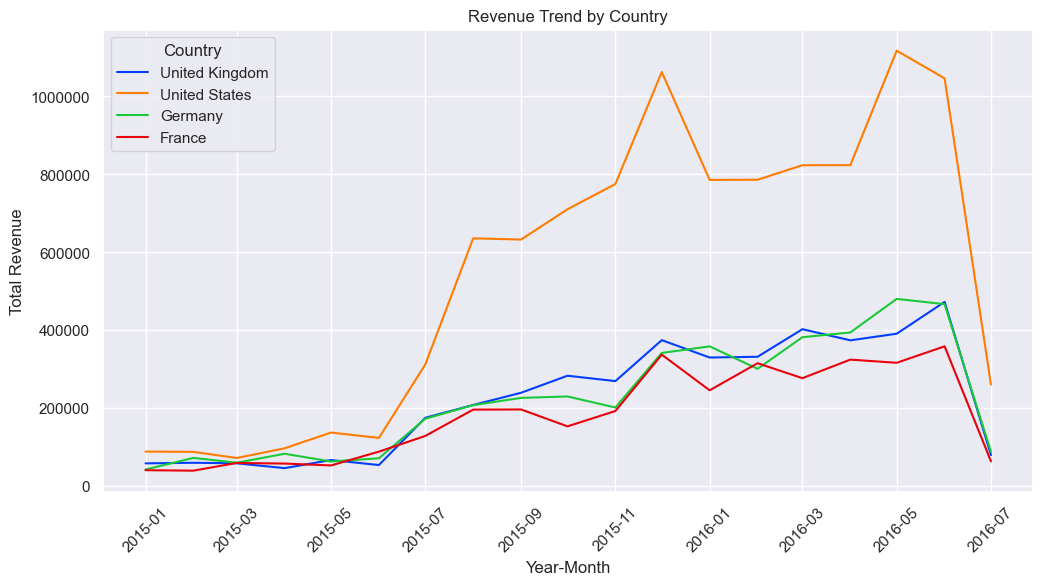

In [203]:
# Convert 'Year_Month' column to datetime type
df['Year_Month'] = pd.to_datetime(df['Year_Month'])

# Sort DataFrame by 'Year_Month' column
df_sorted = df.sort_values(by='Year_Month')

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=df_sorted, x='Year_Month', y='Revenue', hue='Country', estimator=sum, ci=None, palette='bright')
ax.ticklabel_format(style='plain', axis='y')
plt.title('Revenue Trend by Country')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()

### Customer Gender Distribution by Country

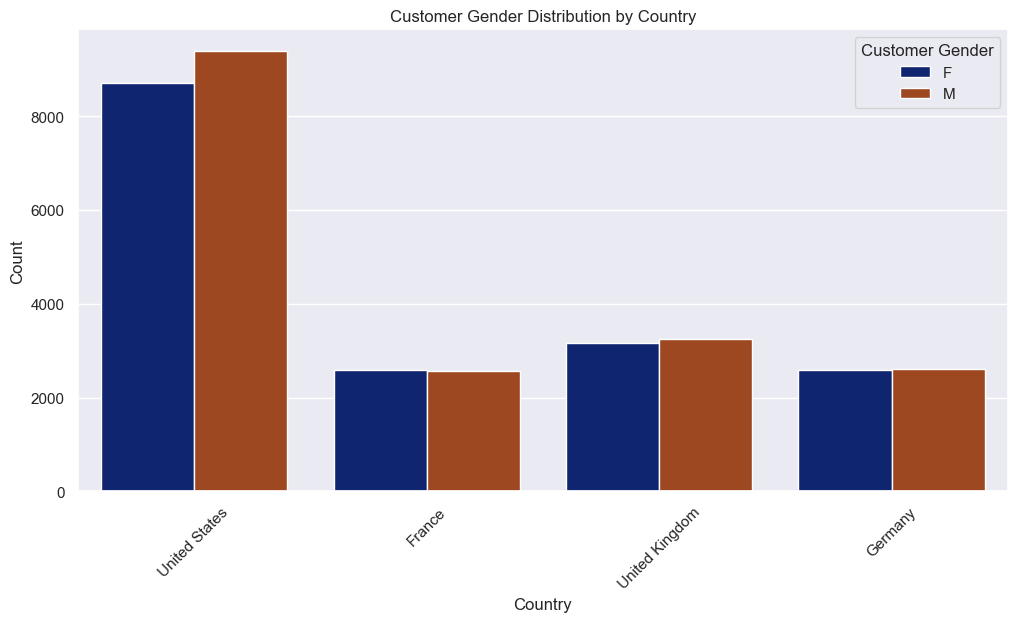

In [205]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Country', hue='Customer Gender', palette='dark')
plt.title('Customer Gender Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Customer Gender')
plt.show()